Import package

In [1]:
import package_.preprocessing as pre
import package_.featureSelection as fs
import package_.classifier as cl
import package_.ensemble as ens
import package_.performanceMetrics as pm
import package_.combinedMetrics as cm

In [2]:
import numpy as np
np.random.seed(42)

Preprocessing

In [3]:
pr = pre.DataPreprocessing()
pr.load_data(path='test_data/exampleData_TCGA_LUAD_2000.csv')
pr.show_data()

All columns are numeric
   class       SFTPC      SLC6A4      CLDN18        AGER       ITLN2  \
0      0  1956543357  1194806369  1431426819    15756623  9202700052   
1      0  1882400352  1212759862  1410754294  1466652971  7496015673   
2      0   185419824   117178896  1350193883  1493867899  8440654097   
3      0  1883454212  8590519685  1413681776  1401127311  7259752678   
4      0   189885652  1090221599  1382853275  1586313843  9767982962   

         LGI3    C13orf36      FAM83A       FABP4  ...        NEXN  \
0  1104918265   781892276  4642643817  1200926661  ...  9059098627   
1  1095692946   599455936  4397002003  1340728849  ...  8334597771   
2   974068509  7331127442  1885183866  1395746318  ...  9298702299   
3  1083758008  4755827619  3122490507   850509221  ...    72414951   
4  1135184185  9122156047  5235413063  1081828059  ...  9521703289   

       RASSF8        NKD1     PLEKHH2        EDN2       WDR86      CHRNB4  \
0  9661630615  7501576879  9103011571  295309

In [4]:
X, y = pr.set_target('class')

In [5]:
X.head()

,SFTPC,SLC6A4,CLDN18,AGER,ITLN2,LGI3,C13orf36,FAM83A,FABP4,HBA1,...,NEXN,RASSF8,NKD1,PLEKHH2,EDN2,WDR86,CHRNB4,RNF128,C11orf21,APOLD1
0,1956543357,1194806369,1431426819,15756623,9202700052,1104918265,781892276,4642643817,1200926661,1162513211,...,9059098627,9661630615,7501576879,9103011571,2953097582,4219718383,459116814,9332454634,6570503916,9026301004
1,1882400352,1212759862,1410754294,1466652971,7496015673,1095692946,599455936,4397002003,1340728849,1425779439,...,8334597771,9468622007,5375091576,8509453578,5702740646,4540306306,790605243,9044077675,7632261671,8920244761
2,185419824,117178896,1350193883,1493867899,8440654097,974068509,7331127442,1885183866,1395746318,1276355899,...,9298702299,983135887,7455911578,8642815992,6183097403,5274858001,621805735,8867469336,551476612,9829651391
3,1883454212,8590519685,1413681776,1401127311,7259752678,1083758008,4755827619,3122490507,850509221,1296542936,...,72414951,9734491337,4948227044,8501260788,3122490507,2761646966,0,9414209755,4755827619,1011022437
4,189885652,1090221599,1382853275,1586313843,9767982962,1135184185,9122156047,5235413063,1081828059,1200170582,...,9521703289,1000492591,8256334196,1013001526,1345282818,4646168419,1158789414,1013041187,5370506078,1007872644


In [6]:
X = pr.standardization()

In [7]:
X.head()

,SFTPC,SLC6A4,CLDN18,AGER,ITLN2,LGI3,C13orf36,FAM83A,FABP4,HBA1,...,NEXN,RASSF8,NKD1,PLEKHH2,EDN2,WDR86,CHRNB4,RNF128,C11orf21,APOLD1
0,0.196223,0.122707,0.143171,0.001183,0.928539,0.110783,0.078967,0.464778,0.121346,0.116256,...,0.908280,0.966734,0.763786,0.912309,0.298526,0.427345,0.061727,0.934190,0.814399,0.906958
1,0.188787,0.124551,0.141104,0.146586,0.756337,0.109858,0.060542,0.440187,0.135472,0.142583,...,0.835556,0.947404,0.547188,0.852753,0.576485,0.459812,0.106294,0.905300,0.946002,0.896288
2,0.018596,0.012034,0.135047,0.149313,0.851650,0.097664,0.740402,0.188727,0.141031,0.127640,...,0.932332,0.097572,0.759134,0.866134,0.625044,0.534203,0.083599,0.887608,0.068354,0.987774
3,0.188892,0.882248,0.141397,0.140019,0.732498,0.108662,0.480311,0.312595,0.085938,0.129659,...,0.006203,0.974031,0.503709,0.851931,0.315650,0.279681,0.000000,0.942380,0.589474,0.100627
4,0.019044,0.111966,0.138313,0.158578,0.985575,0.113818,0.921286,0.524121,0.109312,0.120022,...,0.954716,0.099310,0.840663,0.100575,0.135993,0.470533,0.155795,0.100753,0.665662,0.100310


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

Feature Selection

Lasso

In [9]:
lasso_features = fs.FeatureSelection(X, y,
                                     method='lasso',
                                     size=100)

In [10]:
lasso_features.show_features()

0       SFTPC
1      SLC6A4
2      CLDN18
3        AGER
4       ITLN2
5        LGI3
6    C13orf36
7      FAM83A
8       FABP4
9        HBA1
Name: Lasso, dtype: object


In [11]:
lasso_features = lasso_features.get_features()

ReliefF

In [12]:
relieff_features = fs.FeatureSelection(X, y,
                                       method='relieff',
                                       size=100)

In [13]:
relieff_features.show_features()

0         CELA2B
1          OR6K3
2    CCL14-CCL15
3          CHRM2
4         MAGEA2
5         SPHKAP
6            OTC
7            CA1
8          FGF10
9        CACNA1S
Name: ReliefF, dtype: object


In [14]:
relieff_features = relieff_features.get_features()

Mrmr

In [15]:
mrmr_features = fs.FeatureSelection(X, y,
                                    method='mrmr',
                                    size=100)

100%|██████████| 100/100 [00:15<00:00,  6.33it/s]


In [16]:
mrmr_features.show_features()

0     PAICS
1    ANGPT4
2     GOLM1
3    SH3GL3
4     HTR3C
5     OR6K3
6      MYOC
7    CELA2B
8       MDK
9     OVCH1
Name: Mrmr, dtype: object


In [17]:
mrmr_features = mrmr_features.get_features()

uTest

In [18]:
uTest_features = fs.FeatureSelection(X, y, 
                                     method='uTest', 
                                     size=100)

In [19]:
uTest_features.show_features()

0    ELMOD1
1    CACHD1
2      TTPA
3    ADAM33
4     KCNN4
5     P2RY1
6    NCCRP1
7     ESYT3
8     NLRC4
9      SOX5
Name: U-test, dtype: object


In [20]:
uTest_features = uTest_features.get_features()

Classifier

Lasso

In [21]:
clf_lasso = cl.Classifier(X, y,
                          features=lasso_features,
                          classifiers=['all'],
                          cross_validation='stratified_k_fold',
                          fold=10)

In [22]:
pm_lasso = pm.PerformanceMetrics(clf_lasso)
pm_lasso.all_metrics()

["ACC: {'adaboost': [0.995, 0.008], 'gradient boosting': [0.979, 0.022], 'random forest': [0.988, 0.011], 'k nearest neighbors': [0.993, 0.012], 'decision tree': [0.981, 0.014], 'extra trees': [0.993, 0.009], 'svm': [0.991, 0.012], 'xgb': [0.988, 0.011]}",
 "Roc Auc: {'adaboost': [0.981, 0.036], 'gradient boosting': [0.922, 0.081], 'random forest': [0.962, 0.055], 'k nearest neighbors': [0.987, 0.03], 'decision tree': [0.929, 0.052], 'extra trees': [0.98, 0.036], 'svm': [0.986, 0.029], 'xgb': [0.955, 0.056]}",
 "F1 score: {'adaboost': [0.997, 0.004], 'gradient boosting': [0.988, 0.012], 'random forest': [0.993, 0.006], 'k nearest neighbors': [0.996, 0.007], 'decision tree': [0.989, 0.008], 'extra trees': [0.996, 0.005], 'svm': [0.995, 0.007], 'xgb': [0.993, 0.006]}",
 "MCC: {'adaboost': [0.971, 0.045], 'gradient boosting': [0.881, 0.13], 'random forest': [0.934, 0.063], 'k nearest neighbors': [0.965, 0.055], 'decision tree': [0.894, 0.082], 'extra trees': [0.962, 0.047], 'svm': [0.957,

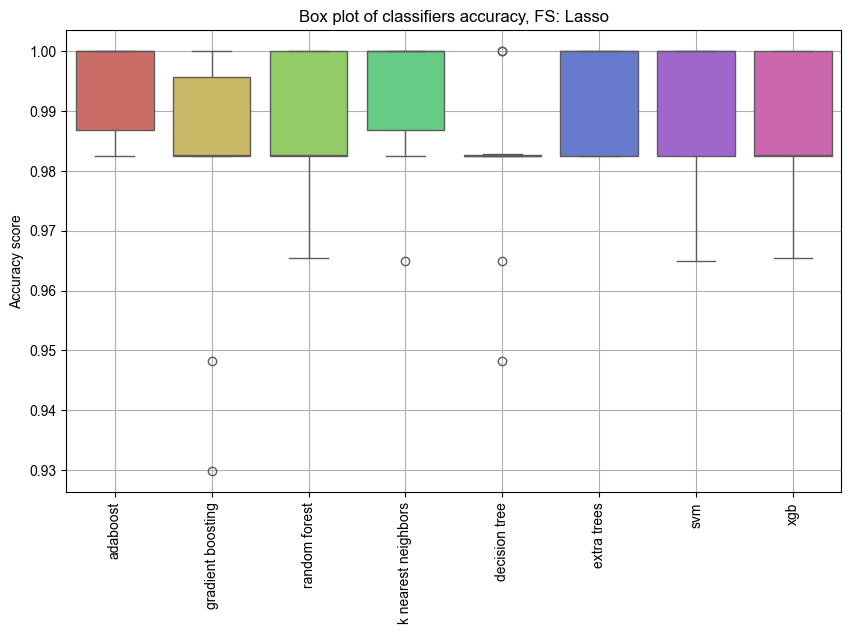

In [23]:
pm_lasso.plot_classifier_acc()

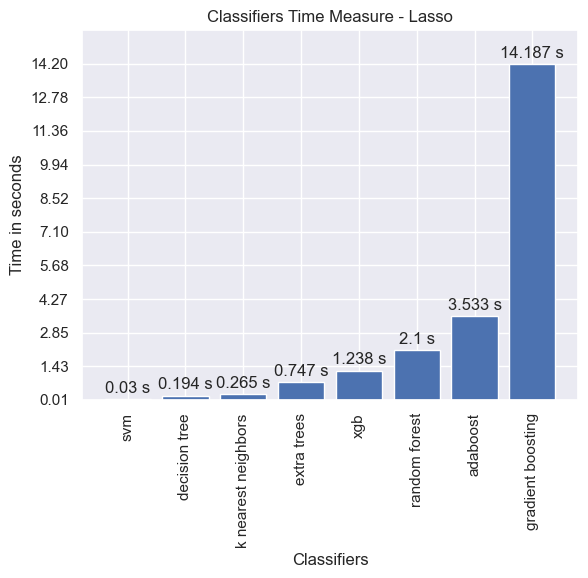

svm: 0.03 s.
decision tree: 0.194 s.
k nearest neighbors: 0.265 s.
extra trees: 0.747 s.
xgb: 1.238 s.
random forest: 2.1 s.
adaboost: 3.533 s.
gradient boosting: 14.187 s.


In [24]:
pm_lasso.plot_classifier_time()

Relieff

In [25]:
clf_relieff = cl.Classifier(X, y, 
                            features=relieff_features, 
                            classifiers=['all'],
                            cross_validation='stratified_k_fold', 
                            fold=10)

In [26]:
pm_relieff = pm.PerformanceMetrics(clf_relieff)
pm_relieff.all_metrics()

["ACC: {'adaboost': [0.995, 0.011], 'gradient boosting': [0.972, 0.022], 'random forest': [0.99, 0.012], 'k nearest neighbors': [0.989, 0.014], 'decision tree': [0.962, 0.026], 'extra trees': [0.988, 0.014], 'svm': [0.991, 0.009], 'xgb': [0.988, 0.018]}",
 "Roc Auc: {'adaboost': [0.997, 0.006], 'gradient boosting': [0.908, 0.074], 'random forest': [0.978, 0.038], 'k nearest neighbors': [0.985, 0.032], 'decision tree': [0.909, 0.068], 'extra trees': [0.969, 0.041], 'svm': [0.979, 0.036], 'xgb': [0.977, 0.038]}",
 "F1 score: {'adaboost': [0.997, 0.006], 'gradient boosting': [0.985, 0.012], 'random forest': [0.994, 0.006], 'k nearest neighbors': [0.994, 0.008], 'decision tree': [0.978, 0.015], 'extra trees': [0.993, 0.008], 'svm': [0.995, 0.005], 'xgb': [0.993, 0.01]}",
 "MCC: {'adaboost': [0.975, 0.051], 'gradient boosting': [0.841, 0.136], 'random forest': [0.944, 0.068], 'k nearest neighbors': [0.946, 0.075], 'decision tree': [0.801, 0.128], 'extra trees': [0.935, 0.074], 'svm': [0.954

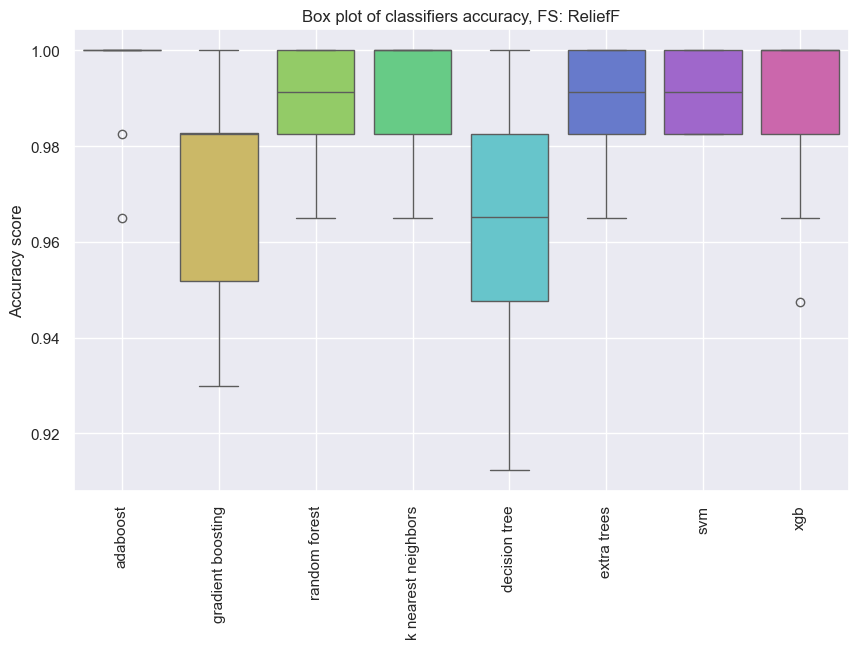

In [27]:
pm_relieff.plot_classifier_acc()

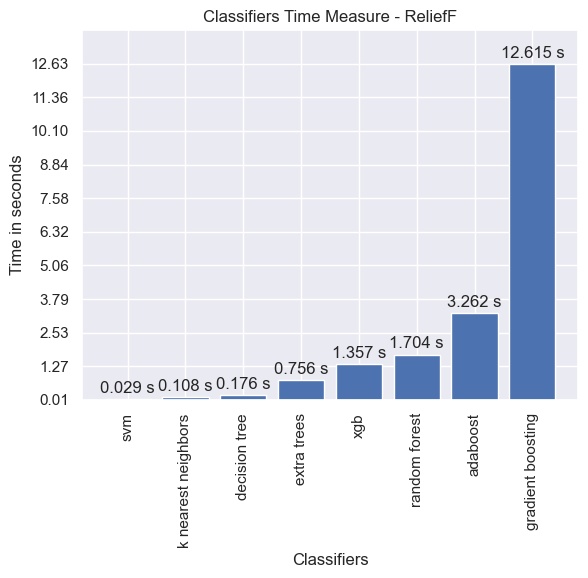

svm: 0.029 s.
k nearest neighbors: 0.108 s.
decision tree: 0.176 s.
extra trees: 0.756 s.
xgb: 1.357 s.
random forest: 1.704 s.
adaboost: 3.262 s.
gradient boosting: 12.615 s.


In [28]:
pm_relieff.plot_classifier_time()

mRMR

In [29]:
clf_mrmr = cl.Classifier(X, y, 
                         features=mrmr_features, 
                         classifiers=['all'],
                         cross_validation='stratified_k_fold',
                         fold=10)

In [30]:
pm_mrmr = pm.PerformanceMetrics(clf_mrmr)
pm_mrmr.all_metrics()

["ACC: {'adaboost': [0.993, 0.009], 'gradient boosting': [0.97, 0.021], 'random forest': [0.988, 0.014], 'k nearest neighbors': [0.991, 0.016], 'decision tree': [0.969, 0.019], 'extra trees': [0.995, 0.008], 'svm': [0.995, 0.008], 'xgb': [0.99, 0.012]}",
 "Roc Auc: {'adaboost': [0.98, 0.036], 'gradient boosting': [0.901, 0.058], 'random forest': [0.969, 0.043], 'k nearest neighbors': [0.979, 0.041], 'decision tree': [0.913, 0.072], 'extra trees': [0.981, 0.036], 'svm': [0.981, 0.036], 'xgb': [0.963, 0.044]}",
 "F1 score: {'adaboost': [0.996, 0.005], 'gradient boosting': [0.984, 0.012], 'random forest': [0.993, 0.008], 'k nearest neighbors': [0.995, 0.009], 'decision tree': [0.982, 0.011], 'extra trees': [0.997, 0.004], 'svm': [0.997, 0.004], 'xgb': [0.994, 0.006]}",
 "MCC: {'adaboost': [0.962, 0.047], 'gradient boosting': [0.843, 0.098], 'random forest': [0.933, 0.078], 'k nearest neighbors': [0.952, 0.091], 'decision tree': [0.835, 0.093], 'extra trees': [0.971, 0.045], 'svm': [0.971,

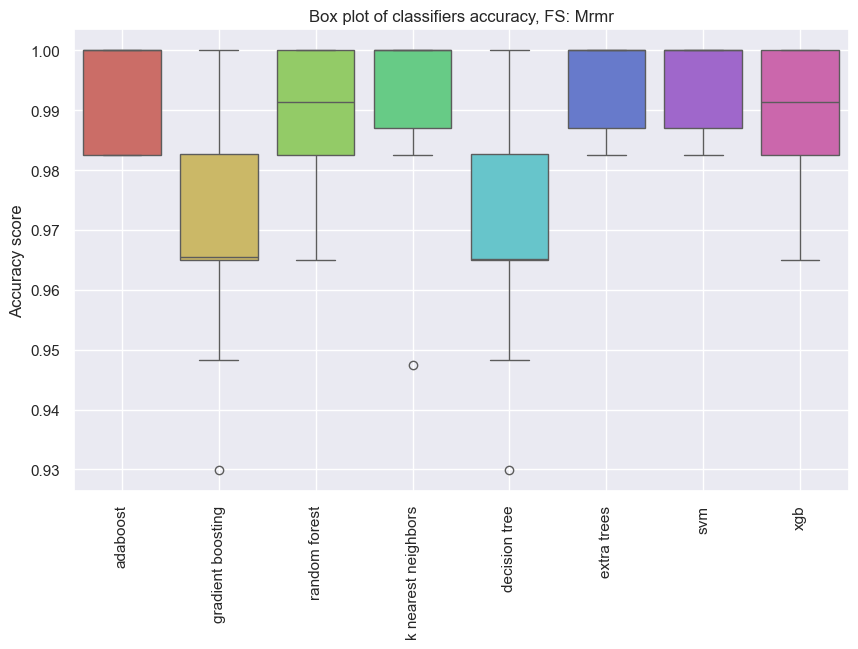

In [31]:
pm_mrmr.plot_classifier_acc()

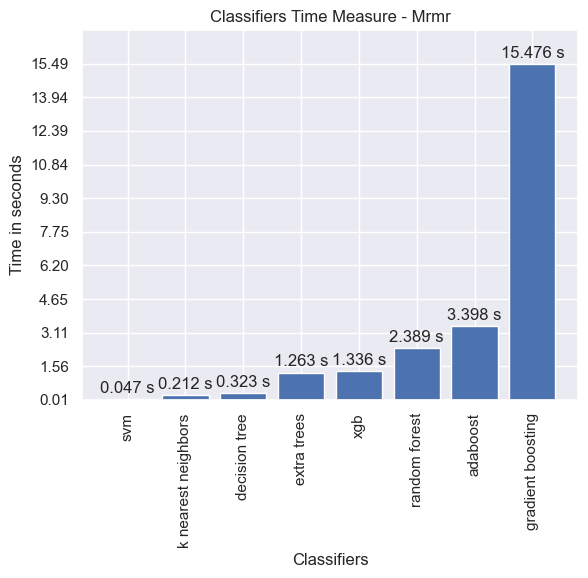

svm: 0.047 s.
k nearest neighbors: 0.212 s.
decision tree: 0.323 s.
extra trees: 1.263 s.
xgb: 1.336 s.
random forest: 2.389 s.
adaboost: 3.398 s.
gradient boosting: 15.476 s.


In [32]:
pm_mrmr.plot_classifier_time()

uTest

In [33]:
clf_uTest = pm.Classifier(X, y,
                          features=uTest_features, 
                          classifiers=['all'],
                          cross_validation='stratified_k_fold',
                          fold=10)

In [34]:
pm_uTest = pm.PerformanceMetrics(clf_uTest)
pm_uTest.all_metrics()

["ACC: {'adaboost': [0.986, 0.013], 'gradient boosting': [0.981, 0.017], 'random forest': [0.99, 0.011], 'k nearest neighbors': [0.99, 0.014], 'decision tree': [0.976, 0.021], 'extra trees': [0.986, 0.013], 'svm': [0.991, 0.012], 'xgb': [0.986, 0.013]}",
 "Roc Auc: {'adaboost': [0.955, 0.055], 'gradient boosting': [0.945, 0.056], 'random forest': [0.956, 0.057], 'k nearest neighbors': [0.97, 0.056], 'decision tree': [0.904, 0.08], 'extra trees': [0.961, 0.056], 'svm': [0.98, 0.032], 'xgb': [0.948, 0.065]}",
 "F1 score: {'adaboost': [0.992, 0.007], 'gradient boosting': [0.989, 0.009], 'random forest': [0.994, 0.006], 'k nearest neighbors': [0.994, 0.008], 'decision tree': [0.987, 0.011], 'extra trees': [0.992, 0.007], 'svm': [0.995, 0.007], 'xgb': [0.992, 0.007]}",
 "MCC: {'adaboost': [0.924, 0.072], 'gradient boosting': [0.897, 0.091], 'random forest': [0.941, 0.066], 'k nearest neighbors': [0.942, 0.082], 'decision tree': [0.86, 0.122], 'extra trees': [0.924, 0.077], 'svm': [0.955, 0.

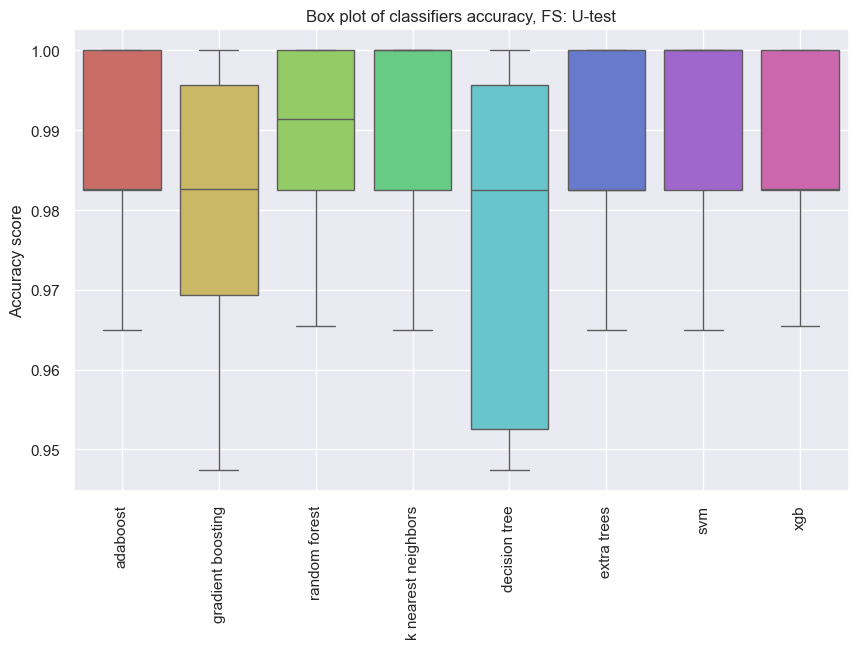

In [35]:
pm_uTest.plot_classifier_acc()

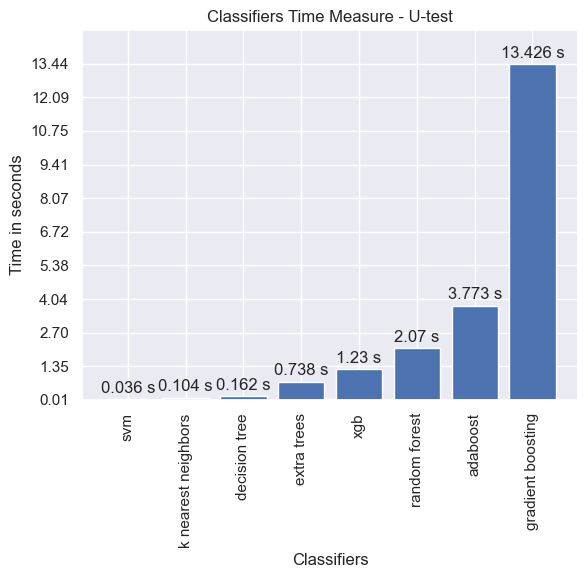

svm: 0.036 s.
k nearest neighbors: 0.104 s.
decision tree: 0.162 s.
extra trees: 0.738 s.
xgb: 1.23 s.
random forest: 2.07 s.
adaboost: 3.773 s.
gradient boosting: 13.426 s.


In [36]:
pm_uTest.plot_classifier_time()

Combined Classifier FS

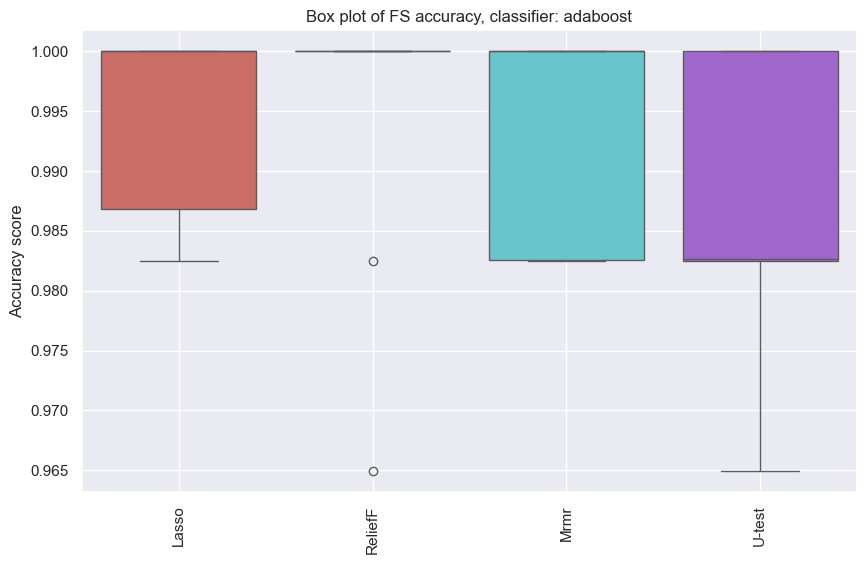

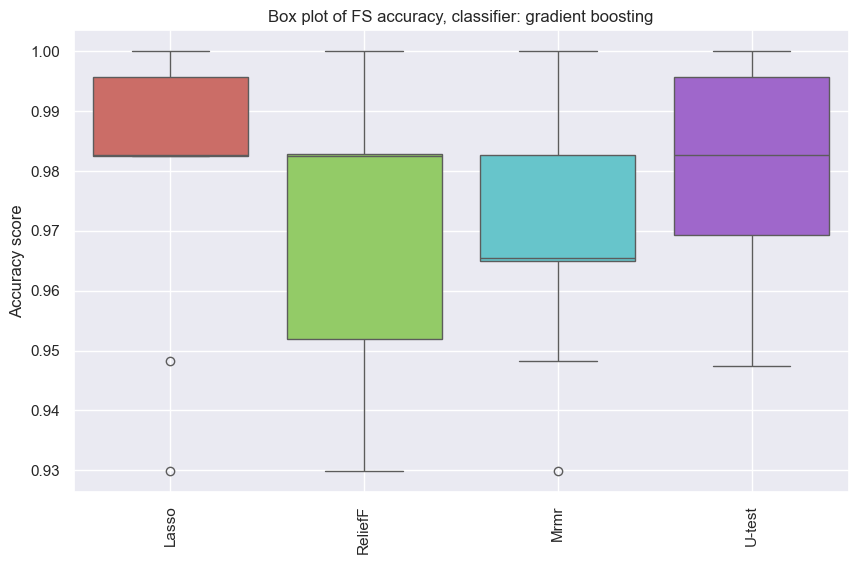

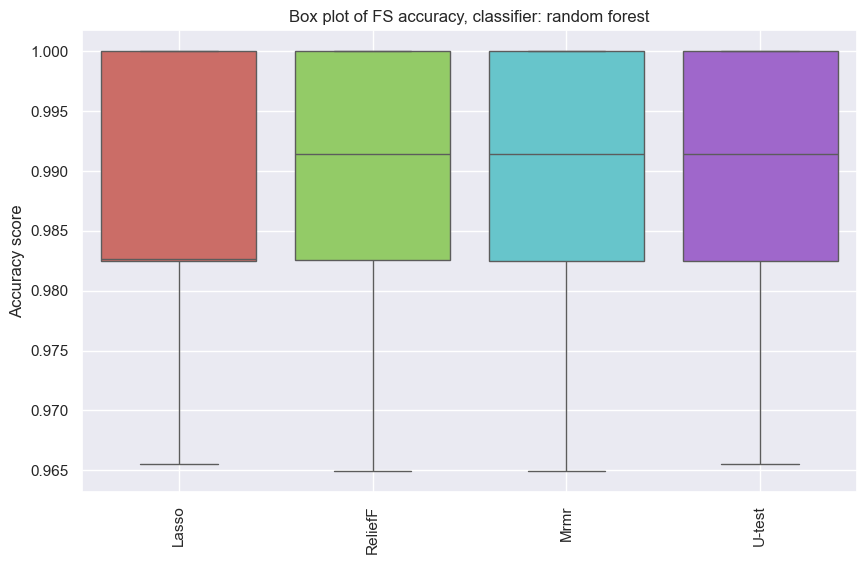

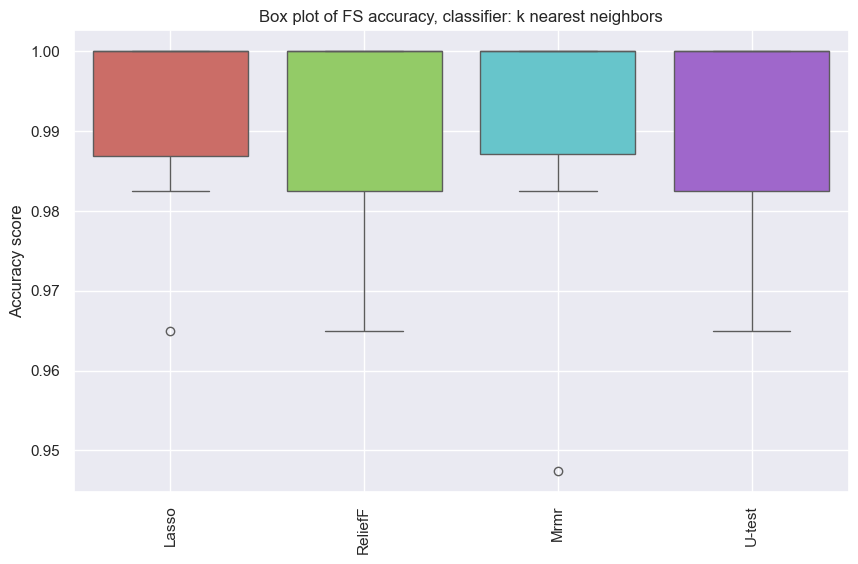

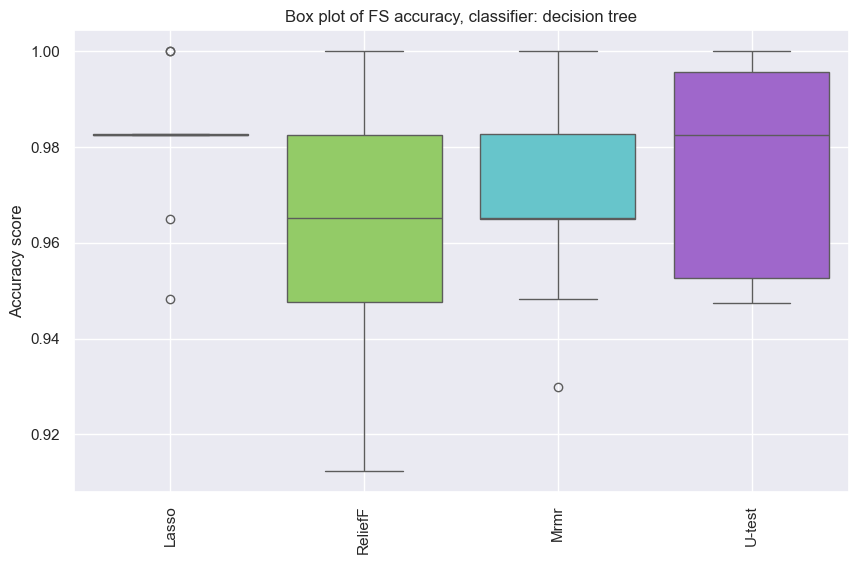

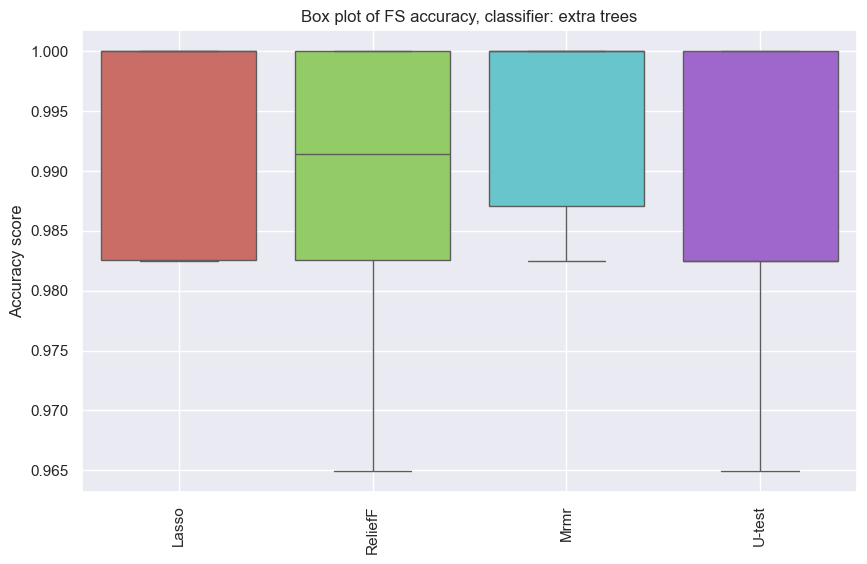

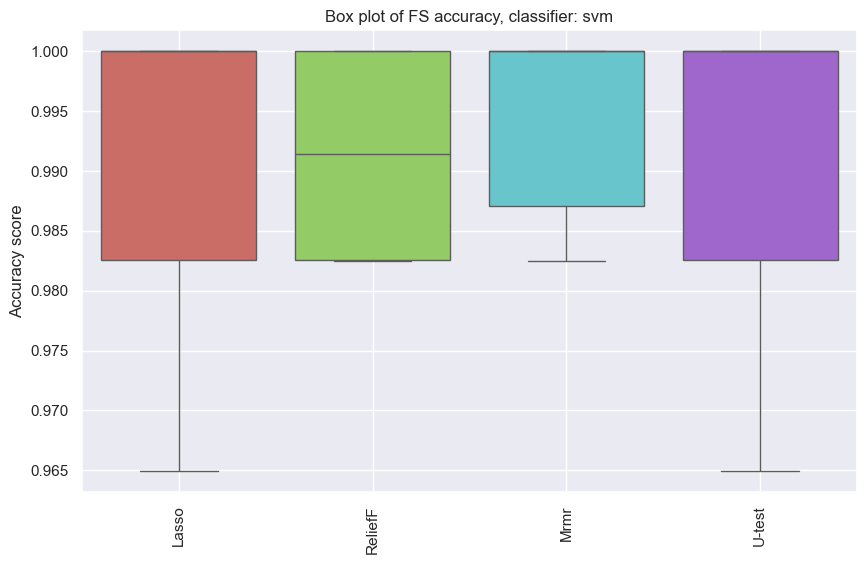

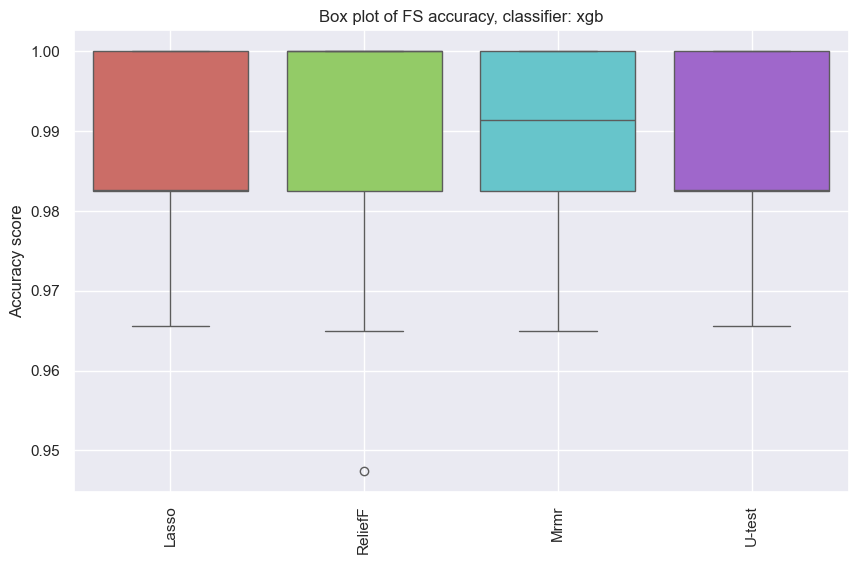

In [37]:
cls = ['adaboost', 
       'gradient boosting',
       'random forest',
       'k nearest neighbors',
       'decision tree', 
       'extra trees',
       'svm',
       'xgb']

cm_cls = cm.CombinedMetrics([pm_lasso,
                             pm_relieff,
                             pm_mrmr,
                             pm_uTest],
                            cls)

cm_cls.plot_classifiers_acc()

Ensemble

Lasso

In [38]:
ens_lasso = ens.Ensemble(X, y,
                         features=lasso_features, 
                         ensemble=['all'], 
                         classifiers=['adaboost',
                                      'random_forest',
                                      'xgb'], 
                         cross_validation='stratified_k_fold',
                         fold=10) 

In [39]:
pm_ens_lasso = pm.PerformanceMetrics(ens_lasso)
pm_ens_lasso.all_metrics()

["ACC: {'voting': [0.991, 0.009], 'bagging': [0.993, 0.009], 'stacking': [0.99, 0.011]}",
 "Roc Auc: {'voting': [0.964, 0.042], 'bagging': [0.98, 0.036], 'stacking': [0.956, 0.057]}",
 "F1 score: {'voting': [0.995, 0.005], 'bagging': [0.996, 0.005], 'stacking': [0.994, 0.006]}",
 "MCC: {'voting': [0.952, 0.049], 'bagging': [0.962, 0.047], 'stacking': [0.941, 0.066]}"]

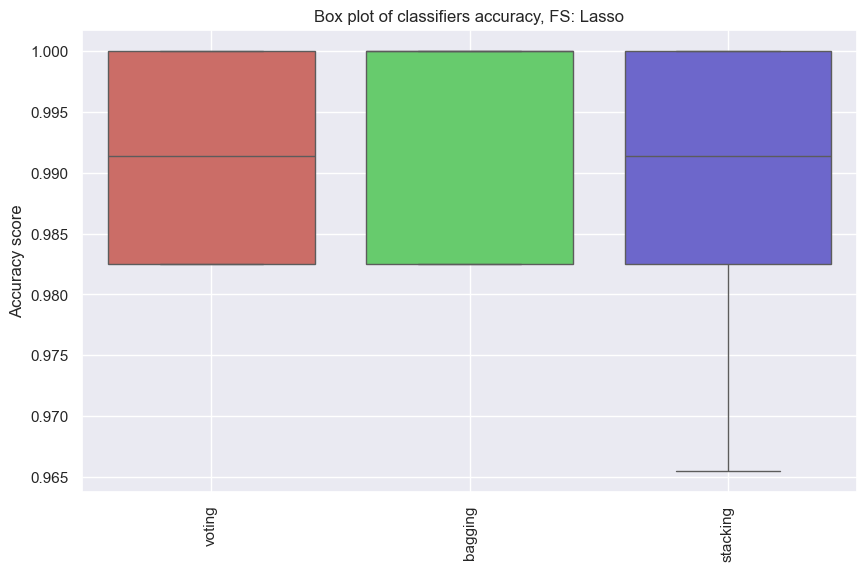

In [40]:
pm_ens_lasso.plot_classifier_acc()

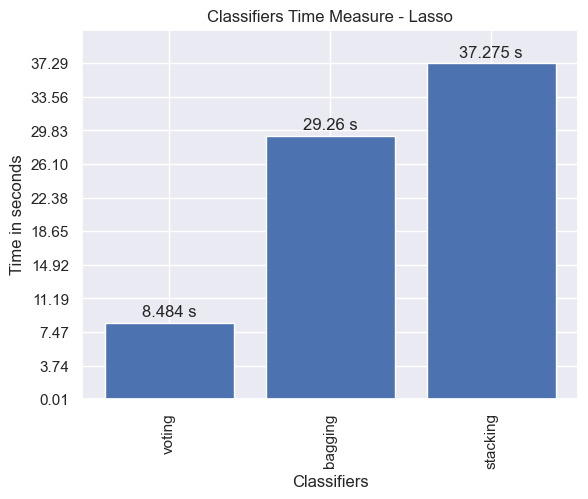

voting: 8.484 s.
bagging: 29.26 s.
stacking: 37.275 s.


In [41]:
pm_ens_lasso.plot_classifier_time()

Relieff

In [42]:
ens_relieff = ens.Ensemble(X, y, 
                           features=relieff_features, 
                           ensemble=['all'],
                           classifiers=['adaboost',
                                        'random_forest',
                                        'xgb'], 
                           cross_validation='stratified_k_fold',
                           fold=10) 

In [43]:
pm_ens_relieff = pm.PerformanceMetrics(ens_relieff)
pm_ens_relieff.all_metrics()

["ACC: {'voting': [0.99, 0.014], 'bagging': [0.991, 0.014], 'stacking': [0.988, 0.018]}",
 "Roc Auc: {'voting': [0.978, 0.038], 'bagging': [0.979, 0.039], 'stacking': [0.977, 0.038]}",
 "F1 score: {'voting': [0.994, 0.008], 'bagging': [0.995, 0.008], 'stacking': [0.993, 0.01]}",
 "MCC: {'voting': [0.945, 0.075], 'bagging': [0.953, 0.076], 'stacking': [0.939, 0.084]}"]

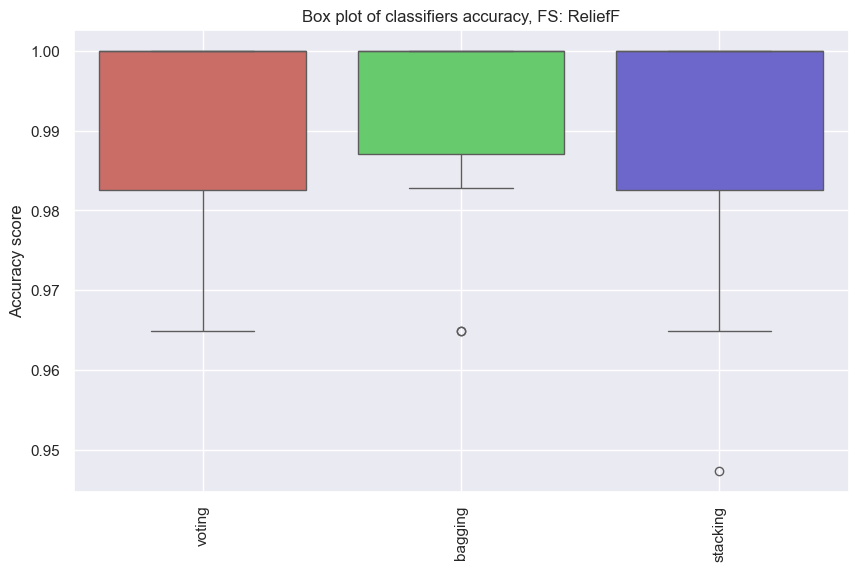

In [44]:
pm_ens_relieff.plot_classifier_acc()

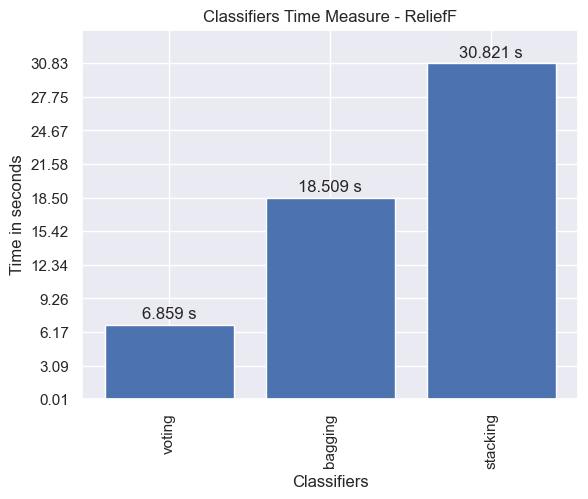

voting: 6.859 s.
bagging: 18.509 s.
stacking: 30.821 s.


In [45]:
pm_ens_relieff.plot_classifier_time()

mRMR

In [46]:
ens_mrmr = ens.Ensemble(X, y,
                        features=mrmr_features,
                        ensemble=['all'], 
                        classifiers=['adaboost',
                                     'random_forest',
                                     'xgb'], 
                        cross_validation='stratified_k_fold',
                        fold=10) 
pm_ens_mrmr = pm.PerformanceMetrics(ens_mrmr)
pm_ens_mrmr.all_metrics()

["ACC: {'voting': [0.991, 0.009], 'bagging': [0.99, 0.011], 'stacking': [0.991, 0.009]}",
 "Roc Auc: {'voting': [0.971, 0.04], 'bagging': [0.963, 0.056], 'stacking': [0.971, 0.04]}",
 "F1 score: {'voting': [0.995, 0.005], 'bagging': [0.994, 0.006], 'stacking': [0.995, 0.005]}",
 "MCC: {'voting': [0.953, 0.048], 'bagging': [0.942, 0.065], 'stacking': [0.953, 0.048]}"]

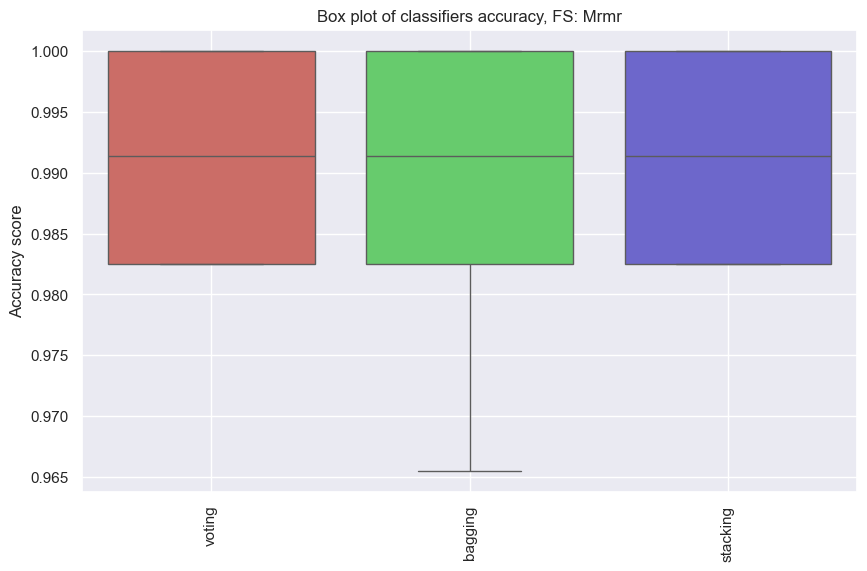

In [47]:
pm_ens_mrmr.plot_classifier_acc()

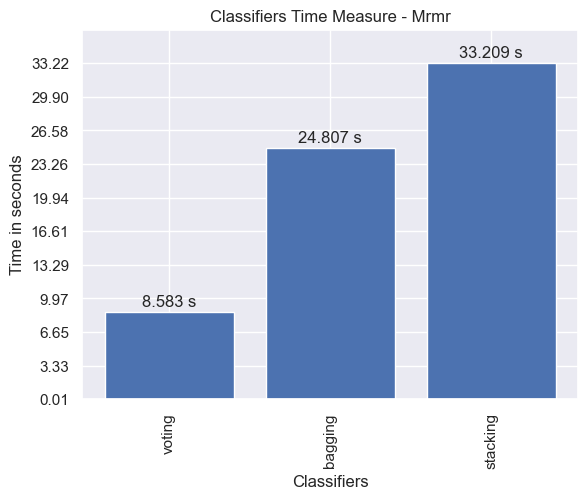

voting: 8.583 s.
bagging: 24.807 s.
stacking: 33.209 s.


In [48]:
pm_ens_mrmr.plot_classifier_time()

uTest

In [49]:
ens_uTest = ens.Ensemble(X, y,
                         features=uTest_features,
                         ensemble=['all'], 
                         classifiers=['adaboost',
                                      'random_forest',
                                      'xgb'],
                         cross_validation='stratified_k_fold',
                         fold=10) 

In [50]:
pm_ens_uTest = pm.PerformanceMetrics(ens_uTest)
pm_ens_uTest.all_metrics()

["ACC: {'voting': [0.99, 0.011], 'bagging': [0.986, 0.015], 'stacking': [0.988, 0.014]}",
 "Roc Auc: {'voting': [0.965, 0.054], 'bagging': [0.961, 0.058], 'stacking': [0.956, 0.066]}",
 "F1 score: {'voting': [0.994, 0.006], 'bagging': [0.992, 0.008], 'stacking': [0.993, 0.007]}",
 "MCC: {'voting': [0.943, 0.064], 'bagging': [0.923, 0.088], 'stacking': [0.933, 0.077]}"]

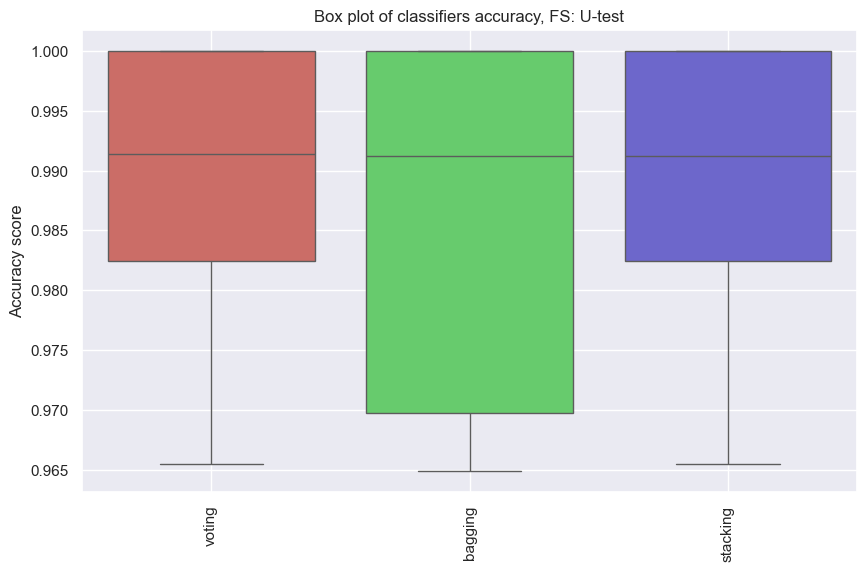

In [51]:
pm_ens_uTest.plot_classifier_acc()

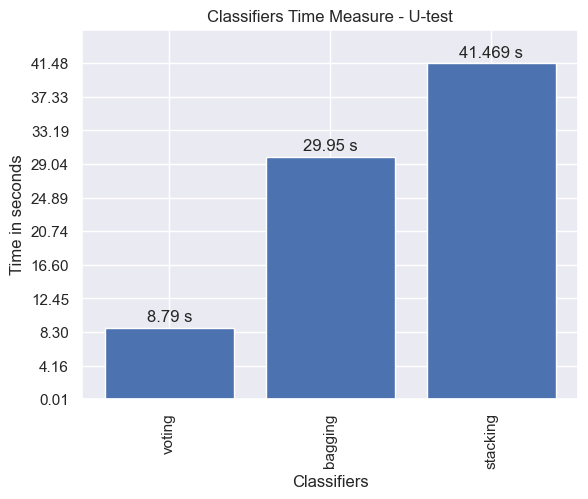

voting: 8.79 s.
bagging: 29.95 s.
stacking: 41.469 s.


In [52]:
pm_ens_uTest.plot_classifier_time()

Combined Ensemble FS

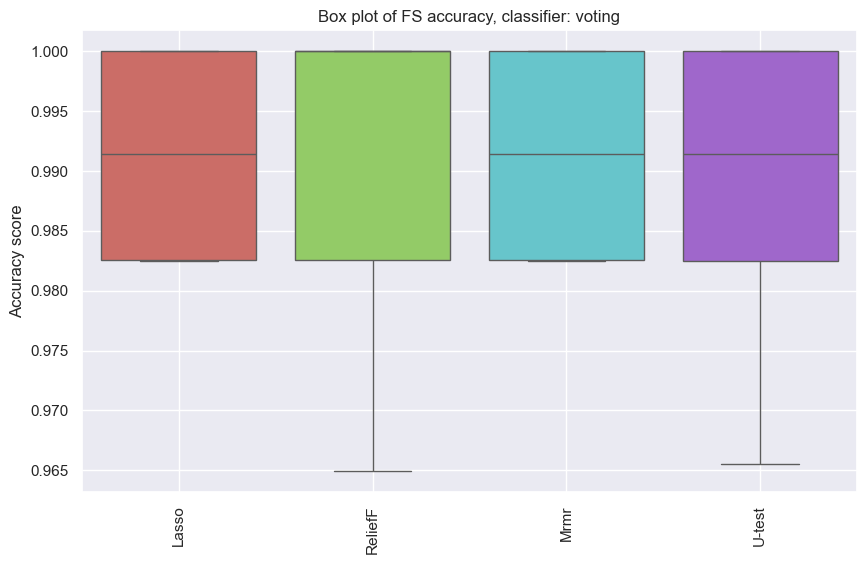

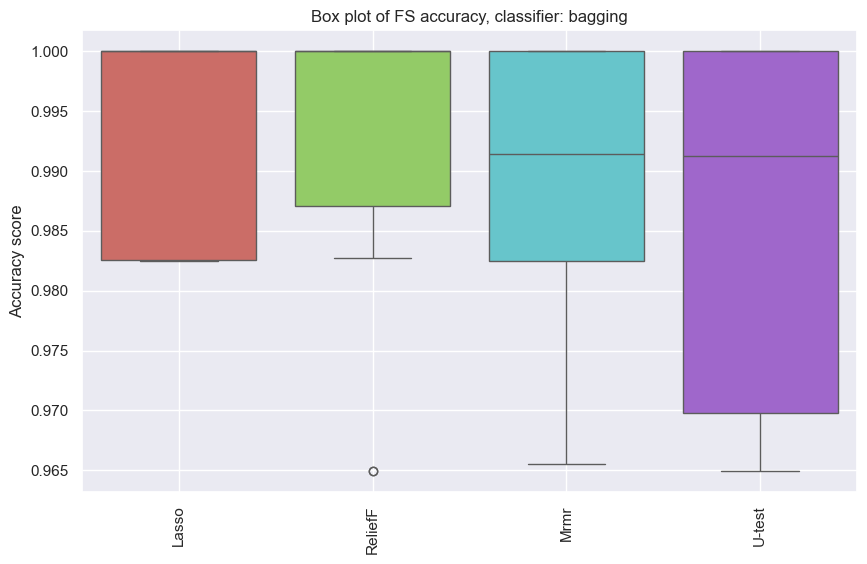

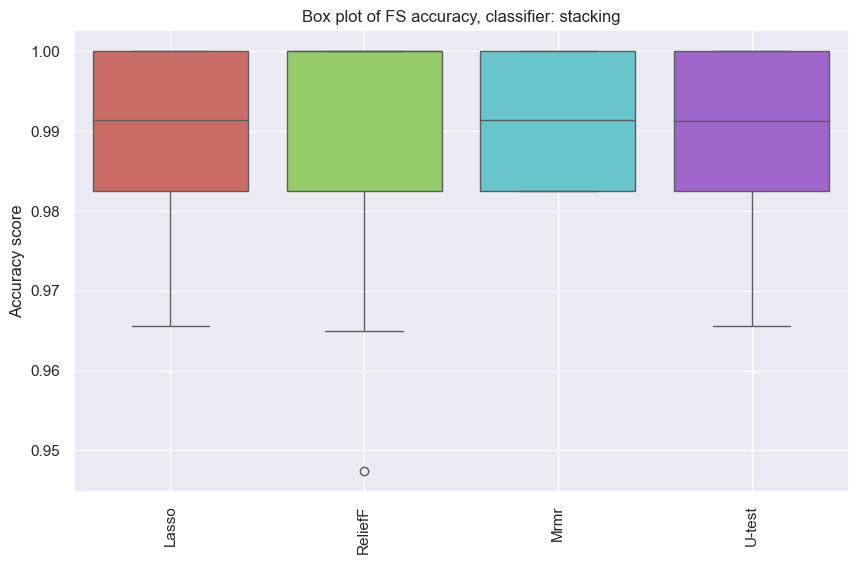

In [53]:
ensemble = ['voting',
            'bagging',
            'stacking']

cM = cm.CombinedMetrics([pm_ens_lasso,
                         pm_ens_relieff,
                         pm_ens_mrmr,
                         pm_ens_uTest],
                        ensemble)

cM.plot_classifiers_acc()

Search the best ensemble model

In [54]:
# LASSO
ensemble = ens.Ensemble(X, y,
                        features=lasso_features,
                        ensemble=['all'], 
                        classifiers=['adaboost',
                                     'extra_trees',
                                     'k_neighbors'],
                        cross_validation='stratified_k_fold',
                        fold=10) 

pm_ens = pm.PerformanceMetrics(ensemble)
pm_ens.accuracy_score()[0]

"ACC: {'voting': [0.995, 0.008], 'bagging': [0.995, 0.008], 'stacking': [0.995, 0.008]}"

In [55]:
# ReliefF
ensemble = ens.Ensemble(X, y,
                        features=relieff_features,
                        ensemble=['all'], 
                        classifiers=['adaboost',
                                     'svm',
                                     'random_forest'],
                        cross_validation='stratified_k_fold',
                        fold=10) 

pm_ens = pm.PerformanceMetrics(ensemble)
pm_ens.accuracy_score()[0]

"ACC: {'voting': [0.99, 0.014], 'bagging': [0.991, 0.014], 'stacking': [0.991, 0.012]}"

In [56]:
# mRMR
ensemble = ens.Ensemble(X, y,
                        features=mrmr_features,
                        ensemble=['all'], 
                        classifiers=['extra_trees',
                                     'svm',
                                     'adaboost'],
                        cross_validation='stratified_k_fold',
                        fold=10) 

pm_ens = pm.PerformanceMetrics(ensemble)
pm_ens.accuracy_score()[0]

"ACC: {'voting': [0.995, 0.008], 'bagging': [0.991, 0.012], 'stacking': [0.995, 0.008]}"

In [57]:
# Utest
ensemble = ens.Ensemble(X, y,
                        features=uTest_features,
                        ensemble=['all'], 
                        classifiers=['svm',
                                     'random_forest',
                                     'k_neighbors'],
                        cross_validation='stratified_k_fold',
                        fold=10) 

pm_ens = pm.PerformanceMetrics(ensemble)
pm_ens.accuracy_score()[0]

"ACC: {'voting': [0.99, 0.014], 'bagging': [0.988, 0.014], 'stacking': [0.99, 0.014]}"